In [419]:
from pathlib import Path
import json

import pandas as pd
import matplotlib.pyplot as plt

# Data

In [224]:
# Small Maze VI
def get_small_maze_vi_results():
    df = pd.read_csv("output_maze6/vi_gamma_experiment.csv")
    df_justmean = pd.read_csv("output_maze6_4/vi_gamma_experiment_just_meanV.csv",
                              names=["PlanningTime (ms)", "meanV", "gamma", "maxIters", "trialNum"],
                             header=0, index_col=False)

    for col in ["numActions", "CumulativeReward"]:
        df_justmean[col] = None
    return pd.concat([df, df_justmean[df.columns].sort_values(by=["gamma","trialNum","maxIters"])], ignore_index=True)


# Large Maze VI
def get_large_maze_vi_results():
    df_justmean = pd.read_csv("output_maze9_2/vi_gamma_experiment_just_meanV.csv")
    for col in ["numActions", "CumulativeReward"]:
        df_justmean[col] = None
    df = pd.concat([pd.read_csv(f"output_maze9_{i}/vi_gamma_experiment.csv") for i in range(3)], ignore_index=True)
    df = pd.concat([df, df_justmean[df.columns].sort_values(by=["gamma","trialNum","maxIters"])], ignore_index=True)
    return df


# Small Maze PI
def get_small_maze_pi_results():
    df_justmean = pd.concat(
        [pd.read_csv("output_maze6_3/pi_gamma_experiment_just_meanV.csv"),
         pd.read_csv("output_maze6_4/pi_gamma_experiment_just_meanV.csv")], ignore_index=True)
    for col in ["numActions", "CumulativeReward"]:
        df_justmean[col] = None
    df = pd.read_csv("output_maze6_2/pi_gamma_experiment.csv")
    df = pd.concat([df, df_justmean[df.columns].sort_values(by=["gamma","trialNum","maxIters"])], ignore_index=True)
    return df


# Large Maze PI
def get_large_maze_pi_results():
    df_justmean = pd.read_csv("output_maze9_2/pi_gamma_experiment_just_meanV.csv")
    for col in ["numActions", "CumulativeReward"]:
        df_justmean[col] = None
    df = pd.read_csv("output_maze9_2/pi_gamma_experiment.csv")
    df = pd.concat([df, df_justmean[df.columns].sort_values(by=["gamma","trialNum","maxIters"])], ignore_index=True)
    return df


def add_identifiers(df, size, algo, problem):
    df["size"] = size
    df["algo"] = algo
    df["problem"] = problem
    return df


def combine_datasets():
    return pd.concat([
        add_identifiers(get_small_maze_vi_results(), "small", "vi", "maze"),
        add_identifiers(get_large_maze_vi_results(), "large", "vi", "maze"),
        add_identifiers(get_small_maze_pi_results(), "small", "pi", "maze"),
        add_identifiers(get_large_maze_pi_results(), "large", "pi", "maze")
    ], ignore_index=True)
    
combined_df = combine_datasets()
combined_df.to_csv("experiment_results_combined.csv")

/Users/kaseyevans/opt/miniconda3/envs/kevans66-hw4/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [448]:
smpi_df = get_large_maze_pi_results()

In [450]:
smpi_df[(smpi_df["gamma"] == 0.99) & (smpi_df["maxIters"] < 12) & (smpi_df["maxIters"] > 8)]

,numActions,CumulativeReward,PlanningTime (ms),meanV,gamma,maxIters,trialNum
0,164.0,-174.0,98892.644275,-67.517915,0.99,10.0,0.0
1,165.0,-181.0,92673.641116,-67.356507,0.99,11.0,0.0
15,165.0,-177.0,90271.637141,-67.517915,0.99,10.0,1.0
16,183.0,-201.0,90745.872824,-67.356507,0.99,11.0,1.0
30,162.0,-176.0,89953.470921,-67.517915,0.99,10.0,2.0
31,157.0,-169.0,90586.323211,-67.356507,0.99,11.0,2.0
45,208.0,-226.0,91745.227012,-67.517915,0.99,10.0,3.0
46,158.0,-172.0,92410.675772,-67.356507,0.99,11.0,3.0
60,173.0,-187.0,89946.286573,-67.517915,0.99,10.0,4.0
61,171.0,-185.0,90411.459213,-67.356507,0.99,11.0,4.0


In [225]:
combined_df.sample(15)

,numActions,CumulativeReward,PlanningTime (ms),meanV,gamma,maxIters,trialNum,size,algo,problem
2172,NaN,NaN,4162.363443,-37.522173,0.9800,10.0,0.0,small,pi,maze
1297,851.0,-869.0,2234.780743,-106.629712,0.9990,171.0,0.0,large,vi,maze
203,166.0,-170.0,381.881466,-37.522062,0.9800,164.0,9.0,small,vi,maze
290,969.0,-973.0,360.233498,-54.838484,0.9900,155.0,5.0,small,vi,maze
2603,177.0,-197.0,680961.862280,-112.197041,0.9999,14.0,2.0,large,pi,maze
2114,157.0,-161.0,62574.814216,-85.794298,0.9990,10.0,7.0,small,pi,maze
939,NaN,NaN,150.099222,-47.475507,0.9990,52.0,0.0,small,vi,maze
1256,711.0,-733.0,2165.876925,-67.318946,0.9900,197.0,8.0,large,vi,maze
1798,NaN,NaN,219.977368,-15.346114,0.9990,14.0,0.0,large,vi,maze
2070,184.0,-186.0,10994.323220,-54.845739,0.9900,9.0,7.0,small,pi,maze


# VI

## SmallMaze

/Users/kaseyevans/opt/miniconda3/envs/kevans66-hw4/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


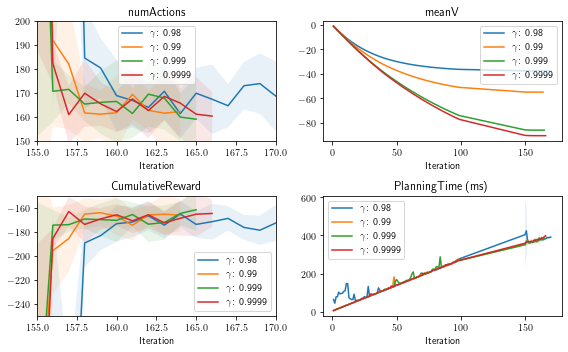

In [208]:
df = get_small_maze_vi_results()

fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
plt.rcParams['text.usetex'] = True
for i, metric in enumerate(["numActions", "CumulativeReward", "meanV", "PlanningTime (ms)"]):
    ax = axs[i%2][i//2]

    if metric == "numActions":
        ax.set_ylim(150, 200)
        ax.set_xlim(155, 170)
    if metric == "CumulativeReward":
        ax.set_ylim(-250, -150)
        ax.set_xlim(155, 170)
    for gamma, data in df.groupby("gamma"):
        data = data.groupby("maxIters").agg({metric: ["mean", "std"]})
        ax.plot(data.index, data[metric]["mean"], label=f"$\gamma$: {gamma}")
        ax.fill_between(data.index,
                            data[metric]["mean"] + data[metric]["std"],
                            data[metric]["mean"] - data[metric]["std"],
                            alpha=0.1)
        ax.set_title(f"{metric}")
        ax.set_xlabel("Iteration")
        ax.legend()
        # ax.set_yscale("log")
# plt.show()
plt.savefig("figures/maze6_gamma.png", dpi=500)
#plt.tight_layout()

## LargeMaze

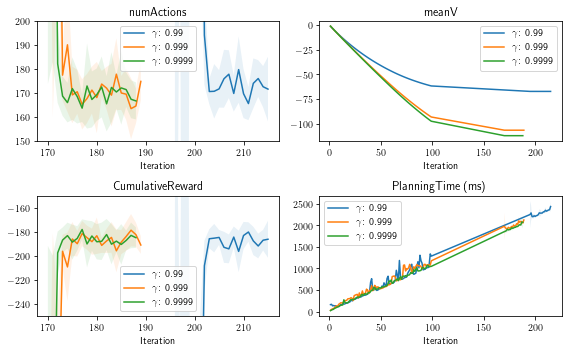

In [226]:
df = get_large_maze_vi_results()

fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
plt.rcParams['text.usetex'] = True
for i, metric in enumerate(["numActions", "CumulativeReward", "meanV", "PlanningTime (ms)"]):
    ax = axs[i%2][i//2]
    if metric == "numActions":
        ax.set_ylim(150, 200)
    if metric == "CumulativeReward":
        ax.set_ylim(-250, -150)
    for gamma, data in df.groupby("gamma"):
        data = data.groupby("maxIters").agg({metric: ["mean", "std"]})
        ax.plot(data.index, data[metric]["mean"], label=f"$\gamma$: {gamma}")
        ax.fill_between(data.index,
                            data[metric]["mean"] + data[metric]["std"],
                            data[metric]["mean"] - data[metric]["std"],
                            alpha=0.1)
        ax.set_title(f"{metric}")
        ax.set_xlabel("Iteration")
        ax.legend()
        # ax.set_yscale("log")
# plt.show()
plt.savefig("figures/maze9_gamma.png", dpi=500)
#plt.tight_layout()

# Policy Iteration

## Small Maze

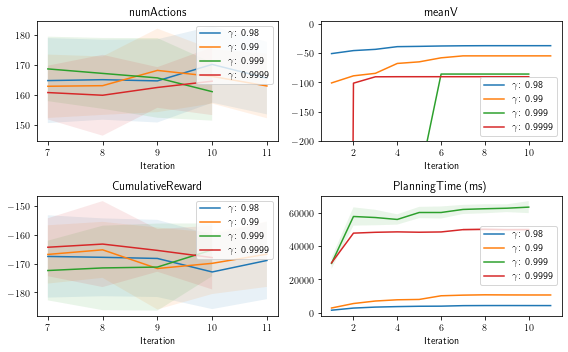

In [217]:
df = get_small_maze_pi_results()

fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
plt.rcParams['text.usetex'] = True
for i, metric in enumerate(["numActions", "CumulativeReward", "meanV", "PlanningTime (ms)"]):
    ax = axs[i%2][i//2]
    #ax.set_xlim(155, 170)
    if metric == "meanV":
        ax.set_ylim(-200, 5)
    #if metric == "CumulativeReward":
    #    ax.set_ylim(-250, -150)
    for gamma, data in df.groupby("gamma"):
        data = data.groupby("maxIters").agg({metric: ["mean", "std"]})
        ax.plot(data.index, data[metric]["mean"], label=f"$\gamma$: {gamma}")
        ax.fill_between(data.index,
                            data[metric]["mean"] + data[metric]["std"],
                            data[metric]["mean"] - data[metric]["std"],
                            alpha=0.1)
        ax.set_title(f"{metric}")
        ax.set_xlabel("Iteration")
        ax.legend()
        # ax.set_yscale("log")
# plt.show()
plt.savefig("figures/maze6_gamma_pi.png", dpi=500)
#plt.tight_layout()

* meanV for gamma > 0.99 is very low for low iterations

## Large Maze

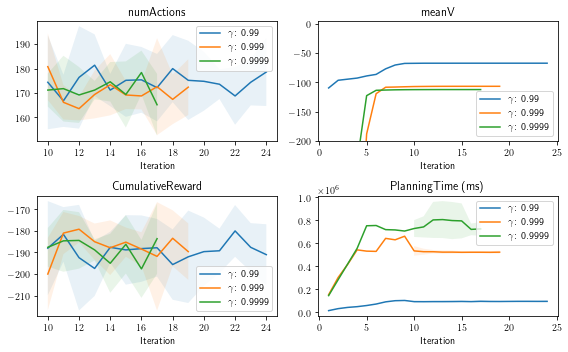

In [215]:
df = get_large_maze_pi_results()

fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
plt.rcParams['text.usetex'] = True
for i, metric in enumerate(["numActions", "CumulativeReward", "meanV", "PlanningTime (ms)"]):
    ax = axs[i%2][i//2]
    #ax.set_xlim(155, 170)
    if metric == "meanV":
        ax.set_ylim(-200, 5)
    #if metric == "CumulativeReward":
    #    ax.set_ylim(-250, -150)
    for gamma, data in df.groupby("gamma"):
        data = data.groupby("maxIters").agg({metric: ["mean", "std"]})
        ax.plot(data.index, data[metric]["mean"], label=f"$\gamma$: {gamma}")
        ax.fill_between(data.index,
                            data[metric]["mean"] + data[metric]["std"],
                            data[metric]["mean"] - data[metric]["std"],
                            alpha=0.1)
        ax.set_title(f"{metric}")
        ax.set_xlabel("Iteration")
        ax.legend()
        # ax.set_yscale("log")
# plt.show()
plt.savefig("figures/maze9_gamma_pi.png", dpi=500)
#plt.tight_layout()

* MeanV for gamma > 0.99 is very low for iterations < 5

# Q-Learning

In [228]:
!ls output_maze6_4

QLearningGridResultsEpisodes.csv   pi_gamma_experiment_just_meanV.csv
QLearningGridResultsSteps.csv      vi_gamma_experiment_just_meanV.csv


In [249]:
!head output_maze6_4/QLearningGridResultsEpisodes.csv

agent,trial,episode,cumulativeReward,averageReward,cumulativeSteps,numSteps
0.9,0.8,0.9,0,0,-36829.0,-1.0160004413914867,36249.0,36249.0
0.9,0.8,0.9,0,1,-40824.0,-1.0293738727132182,40130.0,3881.0
0.9,0.8,0.9,0,2,-45750.0,-1.060266896254843,44776.0,4646.0
0.9,0.8,0.9,0,3,-50213.0,-1.0247990815154995,49131.0,4355.0
0.9,0.8,0.9,0,4,-56323.0,-1.0741912798874824,54819.0,5688.0
0.9,0.8,0.9,0,5,-65623.0,-1.039570757880617,63765.0,8946.0
0.9,0.8,0.9,0,6,-77999.0,-1.0272244355909694,75813.0,12048.0
0.9,0.8,0.9,0,7,-88208.0,-1.0302755071147442,85722.0,9909.0
0.9,0.8,0.9,0,8,-95181.0,-1.042146166492303,92413.0,6691.0


In [257]:
q_df = pd.read_csv("output_maze6_4/QLearningGridResultsSteps.csv",
                   index_col=False, header=0, names=["alpha", "gamma", "epsilon", "trial", "step", "cumulativeReward"])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
q_df

In [248]:
for q_df

,alpha,gamma,epsilon,trial,step,cumulativeReward
0,0.9,0.8,0.9,0,0,-1.0
1,0.9,0.8,0.9,0,1,-2.0
2,0.9,0.8,0.9,0,2,-3.0
3,0.9,0.8,0.9,0,3,-4.0
4,0.9,0.8,0.9,0,4,-5.0
...,...,...,...,...,...,...
5993360,0.9,0.9,0.9,2,286452,-295065.0
5993361,0.9,0.9,0.9,2,286453,-295068.0
5993362,0.9,0.9,0.9,2,286454,-295069.0
5993363,0.9,0.9,0.9,2,286455,-295072.0


In [258]:
q_df = pd.read_csv("output_maze6_4/QLearningGridResultsEpisodes.csv",
                   index_col=False, header=0, names=["alpha", "gamma", "epsilon", "trial", "episode", "cumulativeReward", "averageReward", "cumulativeSteps", "numSteps"])

In [270]:
q_df.head()

,alpha,gamma,epsilon,trial,episode,cumulativeReward,averageReward,cumulativeSteps,numSteps
0,0.9,0.8,0.9,0,0,-9486.0,-1.025957,9246.0,9246.0
1,0.9,0.8,0.9,0,1,-31996.0,-1.025513,31196.0,21950.0
2,0.9,0.8,0.9,0,2,-40018.0,-1.046166,38864.0,7668.0
3,0.9,0.8,0.9,0,3,-67495.0,-1.017554,65867.0,27003.0
4,0.9,0.8,0.9,0,4,-75140.0,-1.050282,73146.0,7279.0


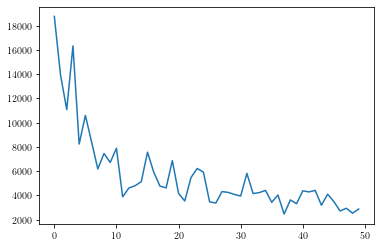

In [277]:
df_f = q_df.query("alpha == 0.9 & gamma == 0.9 & epsilon == 0.9").groupby("episode", as_index=False).agg({"numSteps": ["mean","std"]})
plt.plot(df_f["episode"], df_f["numSteps"]["mean"])

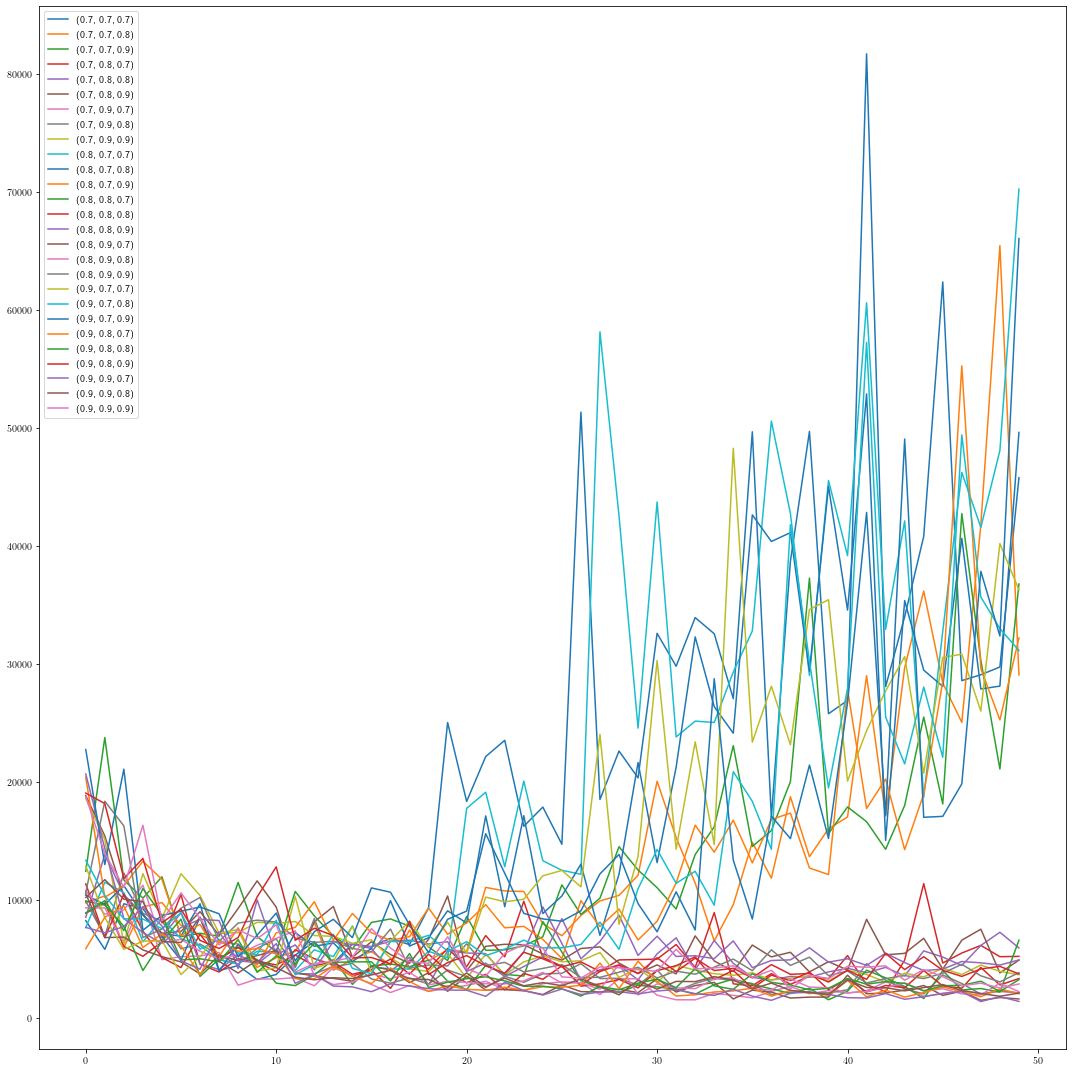

In [279]:
fig, ax = plt.subplots(figsize=(15,15), tight_layout=True)
for (alpha,gamma,epsilon), data in q_df.groupby(["alpha", "gamma", "epsilon"]):
    df_t = data.groupby("episode", as_index=False).agg({"numSteps": ["mean","std"]})
    ax.plot(df_t["episode"], df_t["numSteps"]["mean"], label=(alpha,gamma,epsilon))
ax.legend()

In [272]:
q_df["episode"].groupby(["alpha","gamma","epsilon", "episode"]).agg({"numSteps": ["mean", "std"]})

numSteps             
                                mean          std
alpha gamma epsilon episode                      
0.7   0.7   0.7     0         8236.6  2573.600260
                    1         5799.4  3060.714018
                    2         9661.4  3682.084369
                    3         9244.6  8225.867754
                    4         7098.0  4785.107575
...                              ...          ...
0.9   0.9   0.9     45        3484.4   978.328830
                    46        2709.8   895.623079
                    47        2929.4   911.877075
                    48        2527.4   837.702095
                    49        2862.4   335.270488

[1350 rows x 2 columns]

In [265]:
3*3*3

27

In [256]:
q_df[.groupby(["alpha", "gamma", "epsilon"])

,alpha,gamma,epsilon,trial,episode,cumulativeReward,averageReward,cumulativeSteps,numSteps
0,0.9,0.8,0.9,0,0,-9486.0,-1.025957,9246.0,9246.0
1,0.9,0.8,0.9,0,1,-31996.0,-1.025513,31196.0,21950.0
2,0.9,0.8,0.9,0,2,-40018.0,-1.046166,38864.0,7668.0
3,0.9,0.8,0.9,0,3,-67495.0,-1.017554,65867.0,27003.0
4,0.9,0.8,0.9,0,4,-75140.0,-1.050282,73146.0,7279.0
...,...,...,...,...,...,...,...,...,...
6745,0.9,0.9,0.9,4,45,-282426.0,-1.029756,274722.0,3159.0
6746,0.9,0.9,0.9,4,46,-285813.0,-1.005940,278089.0,3367.0
6747,0.9,0.9,0.9,4,47,-290012.0,-1.071447,282008.0,3919.0
6748,0.9,0.9,0.9,4,48,-292530.0,-1.037068,284436.0,2428.0


In [94]:
!ls -lh

total 13029400
-rw-r--r--    1 kaseyevans  staff    51K Nov 19 22:23 Analysis.ipynb
-rw-r--r--    1 kaseyevans  staff    95K Nov 18 20:09 Explore MDP.ipynb
-rw-r--r--    1 kaseyevans  staff    12K Nov 19 15:38 Maze.ipynb
-rw-r--r--    1 kaseyevans  staff   8.8K Nov 18 21:11 PolicyIteration.ipynb
-rw-r--r--    1 kaseyevans  staff   554B Nov 19 08:04 README.txt
-rw-r--r--    1 kaseyevans  staff    11K Nov 18 20:31 ValueIteration.ipynb
-rw-r--r--    1 kaseyevans  staff   129K Nov 14 18:55 expDataEpisodes.csv
-rw-r--r--    1 kaseyevans  staff   9.1M Nov 14 18:55 expDataSteps.csv
drwxr-xr-x    3 kaseyevans  staff    96B Nov 19 18:25 experimentation_output_maze6
drwxr-xr-x    3 kaseyevans  staff    96B Nov 19 22:22 figures
drwxr-xr-x   16 kaseyevans  staff   512B Nov 16 19:52 hiivemdptoolbox
-rw-r--r--    1 kaseyevans  staff     0B Nov 16 19:54 main.py
-rw-r--r--    1 kaseyevans  staff   3.4K Nov 18 10:18 maze.py
-rw-r--r--@   1 kaseyevans  staff   1.0K Nov 15 18:03 maze1.csv
-rw-r--r--    1

In [100]:
q_df = pd.read_csv("qLearningGammaExpDataSteps.csv")

In [97]:
print(q_df.shape)
q_df.head()

(1200, 7)


,agent,trial,episode,cumulativeReward,averageReward,cumulativeSteps,numSteps
0,Q-Learning Gamma: 0.9,0,0,-1149.2,-2.235798,514.0,514.0
1,Q-Learning Gamma: 0.9,0,1,-3613.8,-0.588631,4701.0,4187.0
2,Q-Learning Gamma: 0.9,0,2,-9990.8,-0.459769,18571.0,13870.0
3,Q-Learning Gamma: 0.9,0,3,-11194.0,-0.297233,22619.0,4048.0
4,Q-Learning Gamma: 0.9,0,4,-16333.4,-0.234109,44572.0,21953.0


In [108]:
q_df.head()

,agent,trial,step,cumulativeReward
0,Q-Learning Gamma: 0.9,0,0,-0.1
1,Q-Learning Gamma: 0.9,0,1,-0.2
2,Q-Learning Gamma: 0.9,0,2,-0.3
3,Q-Learning Gamma: 0.9,0,3,-0.4
4,Q-Learning Gamma: 0.9,0,4,-0.5


In [107]:
q_df.groupby(["agent", "trial", "step"]).agg("count")

cumulativeReward
agent                  trial step                   
Q-Learning Gamma: 0.9  0     0                     1
                             1                     1
                             2                     1
                             3                     1
                             4                     1
...                                              ...
Q-Learning Gamma: 0.99 19    80195                 1
                             80196                 1
                             80197                 1
                             80198                 1
                             80199                 1

[79351996 rows x 1 columns]

In [180]:
q_df["gamma"] = q_df["agent"].apply(lambda x: float(x.split(":")[-1].strip()))

In [181]:
q_df["gamma"].sample(10)

44914221    0.90
4522483     0.90
5966500     0.90
49125673    0.95
78186153    0.99
67492253    0.95
5107927     0.90
10847320    0.90
5237285     0.90
5680580     0.90
Name: gamma, dtype: float64

In [182]:
q_df.sample(10)

,agent,trial,step,cumulativeReward,gamma
60791621,Q-Learning Gamma: 0.95,10,4591106,-501675.399958,0.95
38445282,Q-Learning Gamma: 0.9,16,3192394,-348929.999991,0.90
44206457,Q-Learning Gamma: 0.9,19,175115,-30785.000000,0.90
6084981,Q-Learning Gamma: 0.9,1,4702254,-503957.899957,0.90
3338137,Q-Learning Gamma: 0.9,1,1955410,-215800.500008,0.90
59841079,Q-Learning Gamma: 0.95,10,3640564,-400283.899980,0.95
47562594,Q-Learning Gamma: 0.95,0,1094880,-132741.500003,0.95
72951291,Q-Learning Gamma: 0.95,14,2331501,-264836.700010,0.95
43015972,Q-Learning Gamma: 0.9,18,1188283,-137940.100003,0.90
54513297,Q-Learning Gamma: 0.95,6,49560,-14986.000000,0.95


In [191]:
agged = (q_df
 .sort_values(by=["gamma","trial","step"])
 .groupby(["gamma", "step"], as_index=False)
 .agg({"cumulativeReward": "mean"}))

In [192]:
agged.head()

,gamma,step,cumulativeReward
0,0.9,0,-0.1
1,0.9,1,-0.2
2,0.9,2,-0.3
3,0.9,3,-0.4
4,0.9,4,-0.5


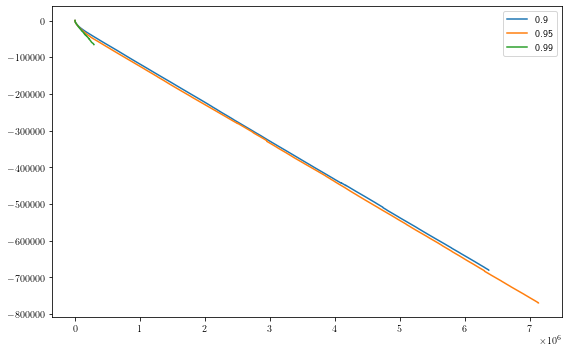

In [195]:
fig, ax = plt.subplots(figsize=(8,5), tight_layout=True)
for gamma, data in agged.groupby("gamma"):
    ax.plot(data["step"], data["cumulativeReward"], label=gamma)
ax.legend()

## Large Maze

In [293]:
from scipy.stats import iqr

In [310]:
dirs = [
    "output_maze9_3/",
    "output_maze9_4/",
    "output_maze9_5/",
    "output_maze9_6/",
    "output_maze9_7/"
]

frames = []
for i, _dir in enumerate(dirs):
    df_temp = pd.read_csv(
        _dir + "QLearningGridResultsEpisodes.csv",
        names = ["alpha", "gamma", "epsilon", "trial", "episode", "cumulativeReward", "averageReward", "cumulativeSteps", "numSteps"],
        header = 0
    )
    df_temp["trial"] = i
    frames.append(df_temp)

large_maze_qlearning_epsidoes_df = pd.concat(frames, ignore_index=True)

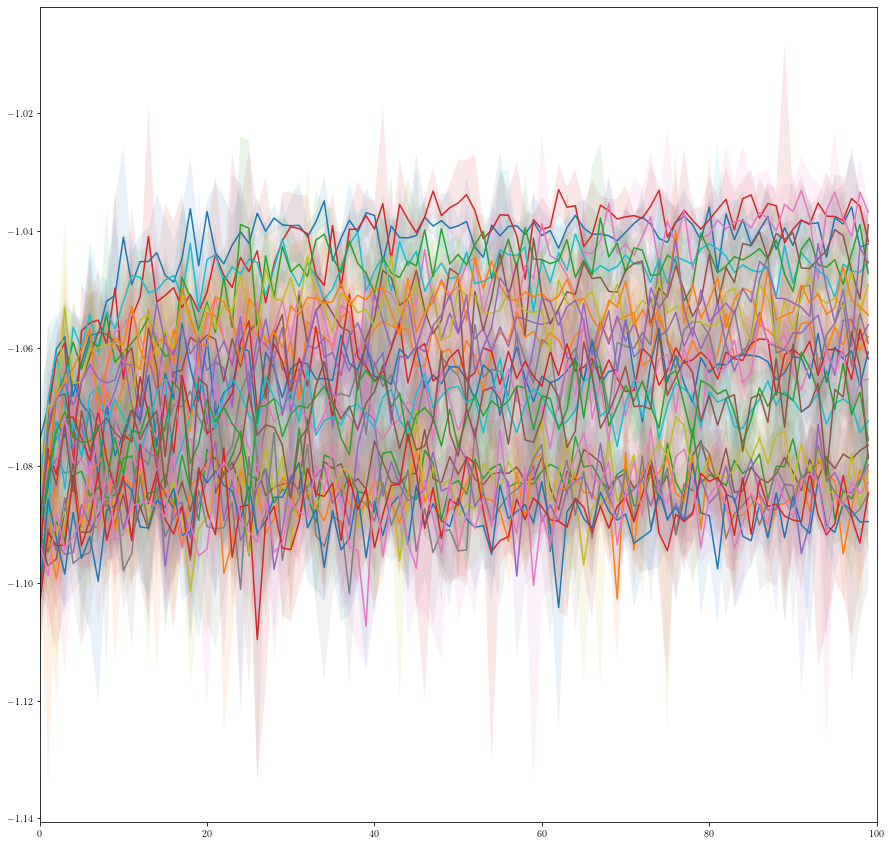

In [314]:
fig, ax = plt.subplots(figsize=(15,15))
for (alpha,gamma,epsilon), data in large_maze_qlearning_epsidoes_df.groupby(["alpha","gamma","epsilon"]):
    grouped = data.groupby("episode").agg({"averageReward": ["median", iqr]})
    ax.plot(grouped.index, grouped["averageReward"]["median"], label=(alpha,gamma,epsilon))
    ax.fill_between(grouped.index,
                    grouped["averageReward"]["median"] - grouped["averageReward"]["iqr"],
                    grouped["averageReward"]["median"] + grouped["averageReward"]["iqr"], alpha=0.1)  
    ax.set_xlim(0, 100)

In [ ]:
large_maze_qlearning_epsi

In [295]:
large_maze_qlearning_epsidoes_df.sample(10)

,alpha,gamma,epsilon,trial,episode,cumulativeReward,averageReward,cumulativeSteps,numSteps
5247,0.9,0.9,0.8,1,45,-1066574.0,-1.083219851717355,991708.0,6609.0
6969,0.7,0.8,0.9,2,66,-6314910.0,-1.0799732827394406,5835504.0,347341.0
2974,0.8,0.8,0.8,1,72,-3777692.0,-1.0467638566096205,3546680.0,14199.0
13170,0.8,0.9,0.7,4,65,-1444844.0,-1.0414464388508033,1365088.0,38218.0
11351,0.7,0.9,0.9,4,46,-1646258.0,-1.0876989074618035,1514298.0,47321.0
11221,0.7,0.9,0.7,4,16,-418438.0,-1.057931535458095,392318.0,22026.0
6464,0.8,0.7,0.7,2,61,-5468049.0,-1.0470590921545346,5218705.0,87592.0
6307,0.8,0.7,0.8,2,4,-221537.0,-1.0626517470706218,205739.0,37892.0
9594,0.7,0.7,0.8,3,90,-7696273.0,-1.0631141627484637,7265295.0,80394.0
9537,0.7,0.7,0.8,3,33,-2247468.0,-1.0592938539136934,2117696.0,160590.0


In [339]:
import numpy as np

def getfirst_numpy_argmax(condition, df):
    array = df.to_numpy()
    imax  = np.argmax(condition(array))
    return df.index[imax]

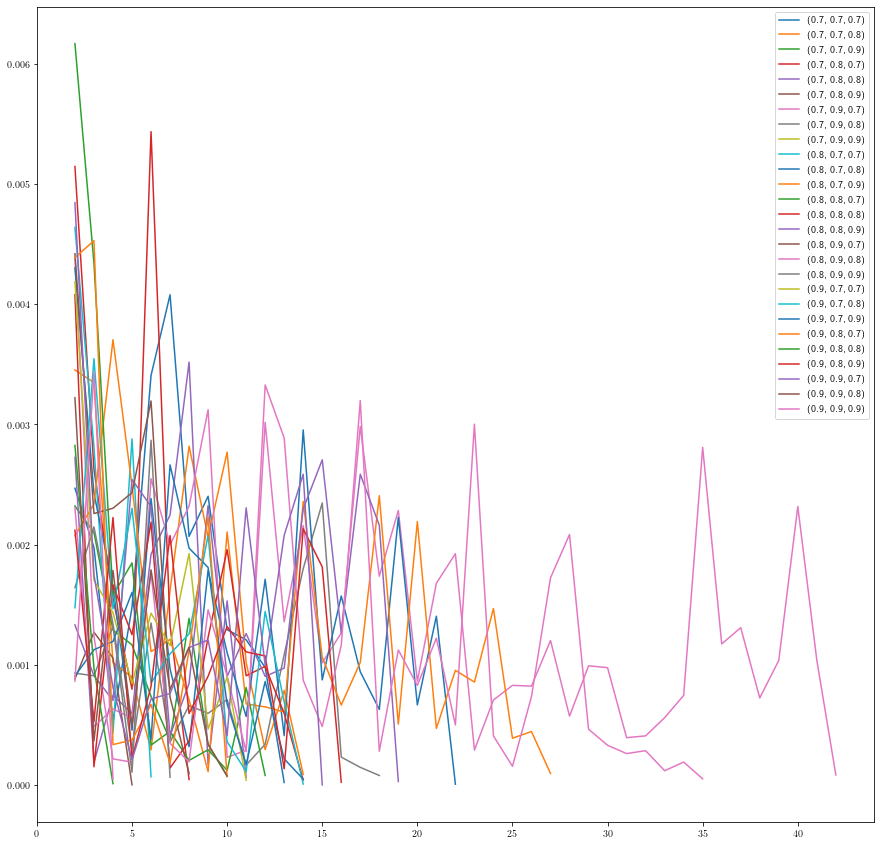

In [346]:
fig, ax = plt.subplots(figsize=(15,15))
for (alpha,gamma,epsilon), data in large_maze_qlearning_epsidoes_df.groupby(["alpha","gamma","epsilon"]):
    grouped = data.groupby("episode").agg({"averageReward": "median"})
    w = grouped["averageReward"].rolling(5, win_type="gaussian", center=True).mean(std=3)
    abs_diff = abs(w.diff(-1))
    f = getfirst_numpy_argmax(lambda x: x < 0.0001, abs_diff)
    ax.plot(abs_diff.iloc[:f+1], label=(alpha,gamma,epsilon))
ax.legend()

In [376]:
def find_convergence_point(series, criterion=0.001, last_n=3):
    diffs = []
    last = np.inf
    i = 0
    for _, item in series.iteritems():
        diffs.append(abs(last - item))
        if all([x < criterion for x in diffs[-last_n:]]):
            return i
        i += 1
        last = item
    return i
    

In [377]:
records = []
for (alpha,gamma,epsilon), data in large_maze_qlearning_epsidoes_df.groupby(["alpha","gamma","epsilon"]):
    grouped = data.groupby("episode").agg({"averageReward": "median"})
    w = grouped["averageReward"].rolling(5, win_type="gaussian", center=True).mean(std=3)
    abs_diff = abs(w.diff(-1))
    f = find_convergence_point(abs_diff)
    records.append((alpha,gamma,epsilon,f))

conv_df = pd.DataFrame(data=records, columns=["alpha","gamma","epsilon","convIter"])

In [381]:
records = []
for param in ["alpha", "gamma", "epsilon"]:
    for value, data in conv_df.groupby(param).agg({"convIter": ["mean", "std"]})
    print(agged)
    records.append((param, agged.index, agged["convIter"]["mean"], agged["convIter"]["std"]))

pd.DataFrame(data=records, columns=["param", "value", "meanConvIter", "stdConvIter"]) 

        convIter          
            mean       std
alpha                     
0.7    12.222222  6.036923
0.8    12.111111  4.755114
0.9     7.888889  1.964971
        convIter          
            mean       std
gamma                     
0.7    10.222222  4.549115
0.8    12.444444  5.502525
0.9     9.555556  4.530759
          convIter          
              mean       std
epsilon                     
0.7      10.444444  6.125992
0.8      12.888889  4.728754
0.9       8.888889  2.758824


,param,value,meanConvIter,stdConvIter
0,alpha,"Float64Index([0.7, 0.8, 0.9], dtype='float64',...",alpha 0.7 12.222222 0.8 12.111111 0.9 ...,alpha 0.7 6.036923 0.8 4.755114 0.9 1...
1,gamma,"Float64Index([0.7, 0.8, 0.9], dtype='float64',...",gamma 0.7 10.222222 0.8 12.444444 0.9 ...,gamma 0.7 4.549115 0.8 5.502525 0.9 4...
2,epsilon,"Float64Index([0.7, 0.8, 0.9], dtype='float64',...",epsilon 0.7 10.444444 0.8 12.888889 0.9 ...,epsilon 0.7 6.125992 0.8 4.728754 0.9 ...


In [384]:
df = pd.read_csv("output_maze9_7/QLearningGridResultsEpisodes.csv")

In [385]:
df.sample(10)

agent  trial  episode  cumulativeReward  averageReward  \
0.9 0.9    0.8      0       18         -601986.0      -1.081896   
    0.9    0.7      0       40         -708362.0      -1.078121   
0.8 0.8    0.7      0       69        -4060601.0      -1.049598   
0.7 0.8    0.7      0       62        -3993164.0      -1.030763   
0.8 0.7    0.9      0       34        -1901439.0      -1.074933   
0.9 0.8    0.7      0        2         -106909.0      -1.059459   
    0.9    0.8      0       10         -419152.0      -1.066130   
0.8 0.9    0.9      0       94        -3348072.0      -1.081876   
0.7 0.9    0.8      0       96        -3154208.0      -1.049929   
0.9 0.7    0.7      0       61        -4723389.0      -1.053944   

         cumulativeSteps  numSteps  
0.9 0.9         559550.0    6203.0  
    0.9         665738.0   10727.0  
0.8 0.8        3875759.0   83229.0  
0.7 0.8        3830960.0   10337.0  
0.8 0.7        1748695.0   29146.0  
0.9 0.8          99715.0    6660.0  
    0.9         388656.0   11432.0  
0.8 0.9        3083596.0   24696.0  
0.7 0.9        2964938.0  137475.0  
0.9 0.7        4482833.0  134324.0

In [386]:
large_maze_qlearning_epsidoes_df

,alpha,gamma,epsilon,trial,episode,cumulativeReward,averageReward,cumulativeSteps,numSteps
0,0.9,0.8,0.9,0,0,-64631.0,-1.098550,58833.0,58833.0
1,0.9,0.8,0.9,0,1,-105583.0,-1.093395,96287.0,37454.0
2,0.9,0.8,0.9,0,2,-155797.0,-1.098871,141983.0,45696.0
3,0.9,0.8,0.9,0,3,-208283.0,-1.093003,190003.0,48020.0
4,0.9,0.8,0.9,0,4,-292291.0,-1.081657,267669.0,77666.0
...,...,...,...,...,...,...,...,...,...
13495,0.9,0.9,0.9,4,95,-3370182.0,-1.085897,3101572.0,34483.0
13496,0.9,0.9,0.9,4,96,-3405800.0,-1.086776,3134346.0,32774.0
13497,0.9,0.9,0.9,4,97,-3421783.0,-1.089874,3149011.0,14665.0
13498,0.9,0.9,0.9,4,98,-3476762.0,-1.074879,3200160.0,51149.0


In [397]:
q_df["size"] = "Small"
large_maze_qlearning_epsidoes_df["size"] = "Large"

maze_q_learning_df = pd.concat([q_df, large_maze_qlearning_epsidoes_df], ignore_index=True).rename({"episode": "iter"}, axis=1)

In [413]:
def make_q_learning_plots(df, param_name, output_name=None):
    
    if param_name == "alpha":
        df = df[(df["gamma"] == 0.9) & (df["epsilon"] == 0.9)]
    elif param_name == "gamma":
        df = df[(df["alpha"] == 0.9) & (df["epsilon"] == 0.9)]
    if param_name == "epsilon":
        df = df[(df["gamma"] == 0.9) & (df["alpha"] == 0.9)]


    df.sort_values(by=["size", param_name, "trial", "iter"], inplace=True)

    size_map = {"Small": 0, "Large": 1}
    metric_map = {"numSteps": 0, "averageReward": 1}

    fig, axs = plt.subplots(2, 2, figsize=(9, 4.33), tight_layout=True)
    plt.rcParams['text.usetex'] = True

    rolled = []
    
    for (param,size,trial), data in df.groupby([param_name,"size","trial"]):
        for metric in ["numSteps", "averageReward"]:
            data[metric] = data[metric].rolling(window=3, center=True).mean()
        data[param_name] = param
        data["size"] = size
        data["trial"] = trial
        rolled.append(data)
    rolled_df = pd.concat(rolled, ignore_index=True)

    agged = rolled_df.groupby(["iter", param_name, "size"], as_index=False).agg(
        {"numSteps": ["median", iqr], "averageReward": ["median", iqr]})
    for (size,param), data in agged.groupby(["size", param_name]):
        for metric in ["numSteps", "averageReward"]:
            ax = axs[metric_map[metric]][size_map[size]]
            x = data["iter"]
            y = data[metric]["median"].rolling(window=5, center=True).mean()
            d = data[metric]["iqr"].rolling(window=5, center=True).mean()
            ax.plot(x, y, label=f"$\\{param_name}: {param}$")
            ax.fill_between(x, y+d, y-d, alpha=0.1)
            ax.set_title(f"{metric} - {size}")
            ax.set_xlabel("Episode")
            ax.legend()

    if output_name:
        plt.savefig(output_name, dpi=500)
    else:
        plt.savefig(f"figures/Maze_Q_Learning_{param_name}.png", dpi=500)

/Users/kaseyevans/opt/miniconda3/envs/kevans66-hw4/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/kaseyevans/opt/miniconda3/envs/kevans66-hw4/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/kaseyevans/opt/miniconda3/envs/kevans66-hw4/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

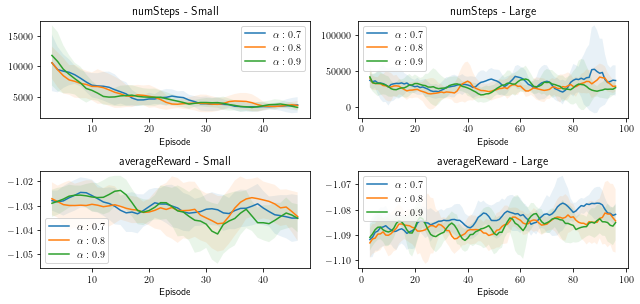

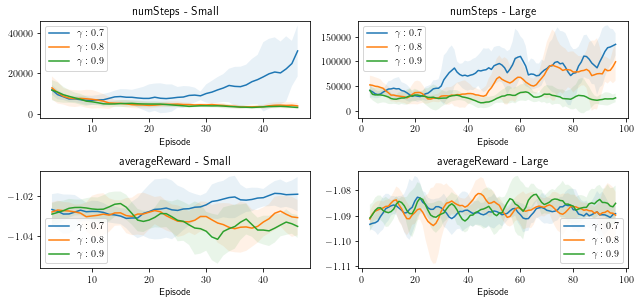

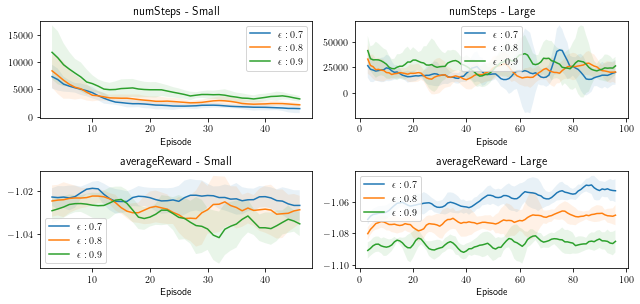

In [414]:
for param in ["alpha", "gamma", "epsilon"]:
    make_q_learning_plots(maze_q_learning_df, param)

In [432]:
def make_q_learning_plots_from_path(data_file_path, param_name, output_name=None):
    p = Path(data_file_path)

    frames = []

    for x in p.iterdir():
        s = x.name.split("_")
        size = s[1]
        param = s[4].split(":")[1].split("-")[0]
        trial = s[4].split(":")[1].split("-")[1].split(".")[0]
        df = pd.read_csv(x)
        df["size"] = size
        df[param_name] = param
        df["trial"] = trial
        frames.append(df)

    df = pd.concat(frames, ignore_index=True).sort_values(by=["size", param_name, "trial", "iter"])

    size_map = {"sm": 0, "lrg": 1}
    size_to_title_map = {"sm": "Small", "lrg": "Large"}
    metric_map = {"numSteps": 0, "lastTotalReward": 1, "wallclock": 2}

    fig, axs = plt.subplots(3, 2, figsize=(9, 6.5), tight_layout=True)
    plt.rcParams['text.usetex'] = True

    rolled = []
    for (param,size,trial), data in df.groupby([param_name,"size","trial"]):
        for metric in ["numSteps", "lastTotalReward", "wallclock"]:
            if metric != "wallclock":
                data[metric] = data[metric].rolling(window=3, center=True).mean()
            else:
                data[metric] = np.cumsum(1e-9 * data[metric])
        data[param_name] = param
        data["size"] = size
        data["trial"] = trial
        rolled.append(data)
    rolled_df = pd.concat(rolled, ignore_index=True)
    
    metric_to_title_map = {"wallclock": "Cumulative Wallclock (s)"}

    agged = rolled_df.groupby(["iter", param_name, "size"], as_index=False).agg(
        {"numSteps": ["median", iqr], "lastTotalReward": ["median", iqr], "wallclock": ["median", iqr]})
    for (size,param), data in agged.groupby(["size", param_name]):
        for metric in ["numSteps", "lastTotalReward", "wallclock"]:
            ax = axs[metric_map[metric]][size_map[size]]
            x = data["iter"]
            y = data[metric]["median"].rolling(window=5, center=True).mean()
            ax.plot(x, y, label=f"$\\{param_name}: {param}$")
            # ax.fill_between(x, y+d, y-d, alpha=0.1)
            ax.set_title(f"{metric_to_title_map.get(metric, metric)} - {size_to_title_map[size]}")
            ax.set_xlabel("Iteration")
            ax.legend()

    if output_name:
        plt.savefig(output_name, dpi=500)
    else:
        plt.savefig(f"figures/Maze_Q_Learning_{param_name}_2.png", dpi=500)

KeyError: 'lastTotalReward'

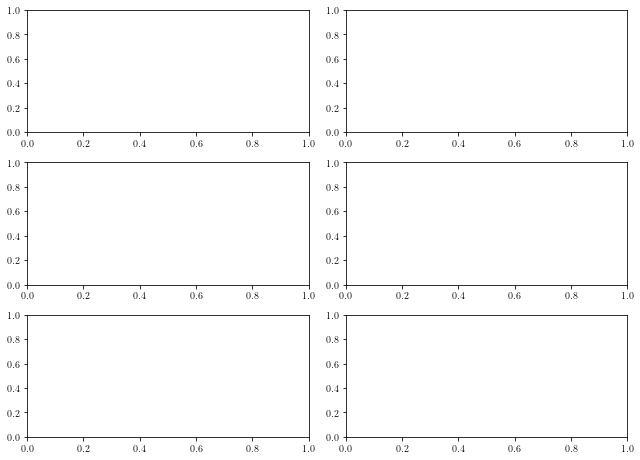

In [430]:
make_q_learning_plots_from_path("/Users/kaseyevans/OMSCS/CS7641/cs7641-hw4.2/output/smprob-26191010/gridworld", "gamma")

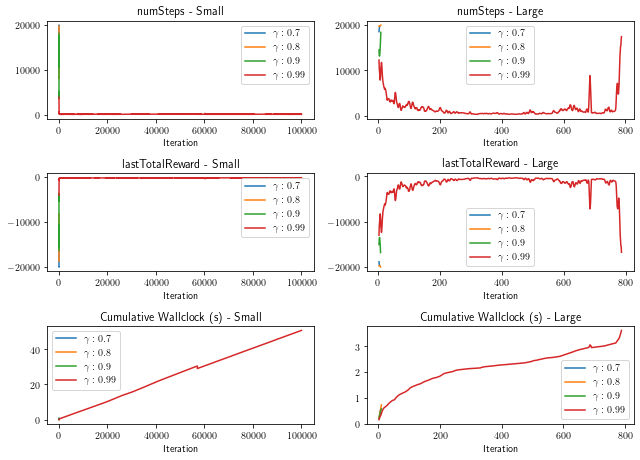

In [433]:
p = "/Users/kaseyevans/OMSCS/CS7641/cs7641-hw4.2/output/smprob-26201010/gridworld"
n = "figures/Maze_Q_Learning_gamma_3.png"
make_q_learning_plots_from_path(p, "gamma", n)

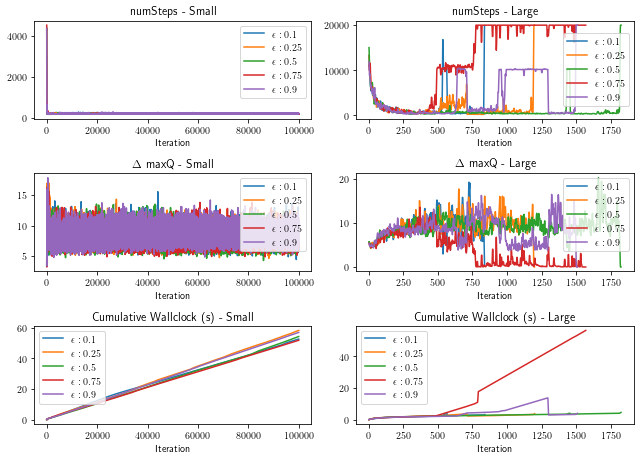

In [423]:
make_q_learning_plots_from_path("/Users/kaseyevans/OMSCS/CS7641/cs7641-hw4.2/output/smprob-26191818/gridworld", "epsilon")

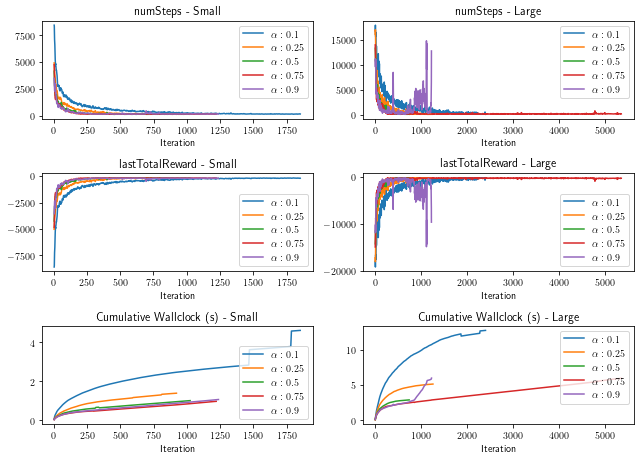

In [436]:
make_q_learning_plots_from_path("/Users/kaseyevans/OMSCS/CS7641/cs7641-hw4.2/output/smprob-26210505/gridworld", "alpha")

In [426]:
maze_q_learning_df[
    (maze_q_learning_df["alpha"] == 0.9) &
    (maze_q_learning_df["gamma"] == 0.9) &
    (maze_q_learning_df["trial"] == 0) &
    (maze_q_learning_df["epsilon"] == 0.9)
]

,alpha,gamma,epsilon,trial,iter,cumulativeReward,averageReward,cumulativeSteps,numSteps,size
6500,0.9,0.9,0.9,0,0,-18287.0,-1.042054,17549.0,17549.0,Small
6501,0.9,0.9,0.9,0,1,-30757.0,-1.023978,29727.0,12178.0,Small
6502,0.9,0.9,0.9,0,2,-52773.0,-1.032258,51055.0,21328.0,Small
6503,0.9,0.9,0.9,0,3,-76110.0,-1.017883,73982.0,22927.0,Small
6504,0.9,0.9,0.9,0,4,-84808.0,-1.034491,82390.0,8408.0,Small
...,...,...,...,...,...,...,...,...,...,...
9445,0.9,0.9,0.9,0,95,-3184842.0,-1.077517,2929544.0,20976.0,Large
9446,0.9,0.9,0.9,0,96,-3189893.0,-1.084138,2934203.0,4659.0,Large
9447,0.9,0.9,0.9,0,97,-3240526.0,-1.072665,2981406.0,47203.0,Large
9448,0.9,0.9,0.9,0,98,-3272544.0,-1.091052,3010752.0,29346.0,Large


In [457]:
for size, data in maze_q_learning_df[
    (maze_q_learning_df["alpha"] == 0.9) &
    (maze_q_learning_df["gamma"] == 0.9) &
#    (maze_q_learning_df["trial"] == 1) &
    (maze_q_learning_df["epsilon"] == 0.7)
].groupby(["size"]):
    data["diff"] = data["averageReward"].diff()
    print(size)
    print(data[abs(data["diff"]) < 0.0001])

Large
       alpha  gamma  epsilon  trial  iter  cumulativeReward  averageReward  \
14321    0.9    0.9      0.7      2    71        -1663741.0      -1.063166   

       cumulativeSteps  numSteps   size      diff  
14321        1567223.0   10037.0  Large -0.000078  
Small
      alpha  gamma  epsilon  trial  iter  cumulativeReward  averageReward  \
5426    0.9    0.9      0.7      3    26         -107250.0      -1.023091   

      cumulativeSteps  numSteps   size      diff  
5426         105008.0    2252.0  Small  0.000049  
